# REGRESSION

We want to use K-Mean regression to segment the data set. We use the steep to calculate total sales for all stores at each timestamp. Once we have the aggregated time series, we can use k-means to identify clusters that represent various overall sales patterns.

The EDA of this regression can be found at https://colab.research.google.com/drive/1VkKG2lVDXLjMhaf-BrfkMVLzhdhswtgm#scrollTo=A_MmcpyaL2lO.


In [ ]:
# Install `gdown` library to download files from Google Drive to Google Colab.
!pip install gdown

In [ ]:
# Import Library
import pandas as pd   # Library used to analyze data.
import numpy as np    # Library used to analyze data.
import seaborn as sns # Library used to do visualization.
import gdown          # library used to download files from Google Drive.
import pickle         # Library used to store and read files in pickle format.
import matplotlib.pyplot as plt

In [ ]:
# Download `Regression` dataset from Google Drive.
url = "https://drive.google.com/file/d/1ohZPIw0lh2MYx3iwIRt9eMVaQI2wK_UV/view?usp=sharing"
output = 'data_regression.pickle'
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1ohZPIw0lh2MYx3iwIRt9eMVaQI2wK_UV
To: /content/data_regression.pickle
100%|██████████| 107M/107M [00:01<00:00, 61.3MB/s] 


'data_regression.pickle'

In [ ]:
# Insert the `Store` dataset to Pandas Dataframe.
df = pd.read_pickle('/content/data_regression.pickle')
df.set_index('date', inplace=True)
df.drop(columns='id',inplace=True)
df.rename(columns={'return_rate': 'ROI'}, inplace=True)
df.head()

,category,product_name,units,store_name,city,status_city,state,region,loc,open_date,cost,price,revenue,production,profit,ROI
date,,,,,,,,,,,,,,,,
2017-01-01,Games,Chutes & Ladders,1,Maven Toys Aguascalientes 1,Aguascalientes,State capital and largest city,Aguascalientes,West,Downtown,2010-07-31,9.99,12.99,12.99,9.99,3.0,0.300
2017-01-01,Toys,Action Figure,1,Maven Toys Puebla 2,Puebla,State capital and largest city,Puebla,East,Downtown,2011-04-01,9.99,15.99,15.99,9.99,6.0,0.601
2017-01-01,Games,Deck Of Cards,1,Maven Toys Mexicali 1,Mexicali,State capital,Baja California,North,Commercial,2003-12-13,3.99,6.99,6.99,3.99,3.0,0.752
2017-01-01,Sports & Outdoors,Dart Gun,1,Maven Toys Saltillo 2,Saltillo,State capital and largest city,Coahuila,North,Commercial,2016-03-23,11.99,15.99,15.99,11.99,4.0,0.334
2017-01-01,Toys,Lego Bricks,1,Maven Toys Puebla 3,Puebla,State capital and largest city,Puebla,East,Residential,2014-12-27,34.99,39.99,39.99,34.99,5.0,0.143


In [ ]:
# Group data month series from all the 50 stores
df_avg = df.copy()
def create_features(df_avg):
    """
    Create time series features based on time series index.
    """
    df_avg = df_avg.copy()
    df_avg['dayofweek'] = df_avg.index.dayofweek
    df_avg['quarter'] = df_avg.index.quarter
    df_avg['month'] = df_avg.index.month
    df_avg['year'] = df_avg.index.year
    df_avg['dayofyear'] = df_avg.index.dayofyear
    df_avg['dayofmonth'] = df_avg.index.day
    df_avg['weekofyear'] = df_avg.index.isocalendar().week
    return df_avg

df_avg = create_features(df_avg)

In [ ]:
df_avg = df_avg.groupby(['store_name','year','month','city','region','loc'])['units', 'revenue', 'production','profit'].sum().reset_index()
df_avg['ROI'] = (df_avg['profit'] / df_avg['production']).round(3)
df_avg.head()

<ipython-input-6-88ee55de6a58>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_avg = df_avg.groupby(['store_name','year','month','city','region','loc'])['units', 'revenue', 'production','profit'].sum().reset_index()


,store_name,year,month,city,region,loc,units,revenue,production,profit,ROI
0,Maven Toys Aguascalientes 1,2017,1,Aguascalientes,West,Downtown,924,11317.76,7643.76,3674.0,0.481
1,Maven Toys Aguascalientes 1,2017,2,Aguascalientes,West,Downtown,747,12075.53,9002.53,3073.0,0.341
2,Maven Toys Aguascalientes 1,2017,3,Aguascalientes,West,Downtown,754,10437.46,7393.46,3044.0,0.412
3,Maven Toys Aguascalientes 1,2017,4,Aguascalientes,West,Downtown,621,10670.79,8270.79,2400.0,0.290
4,Maven Toys Aguascalientes 1,2017,5,Aguascalientes,West,Downtown,1150,18686.50,13629.50,5057.0,0.371


### Check outlier

In [ ]:
df_outlier = df[['units','revenue', 'production', 'profit', 'ROI']].copy()
df_outlier= df_outlier.reset_index()
df_outlier = df_outlier.groupby(['date'])['units', 'revenue', 'production','profit','ROI'].sum().reset_index()
df_outlier.set_index('date', inplace=True)
df_outlier.head()

<ipython-input-7-6e6035e90318>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_outlier = df_outlier.groupby(['date'])['units', 'revenue', 'production','profit','ROI'].sum().reset_index()


,units,revenue,production,profit,ROI
date,,,,,
2017-01-01,1485,21076.15,15018.15,6058.0,603.131
2017-01-02,1406,19750.94,12965.94,6785.0,567.682
2017-01-03,750,11759.50,8376.50,3383.0,297.383
2017-01-04,960,14814.40,9524.40,5290.0,482.544
2017-01-05,1370,19791.30,13779.30,6012.0,548.384


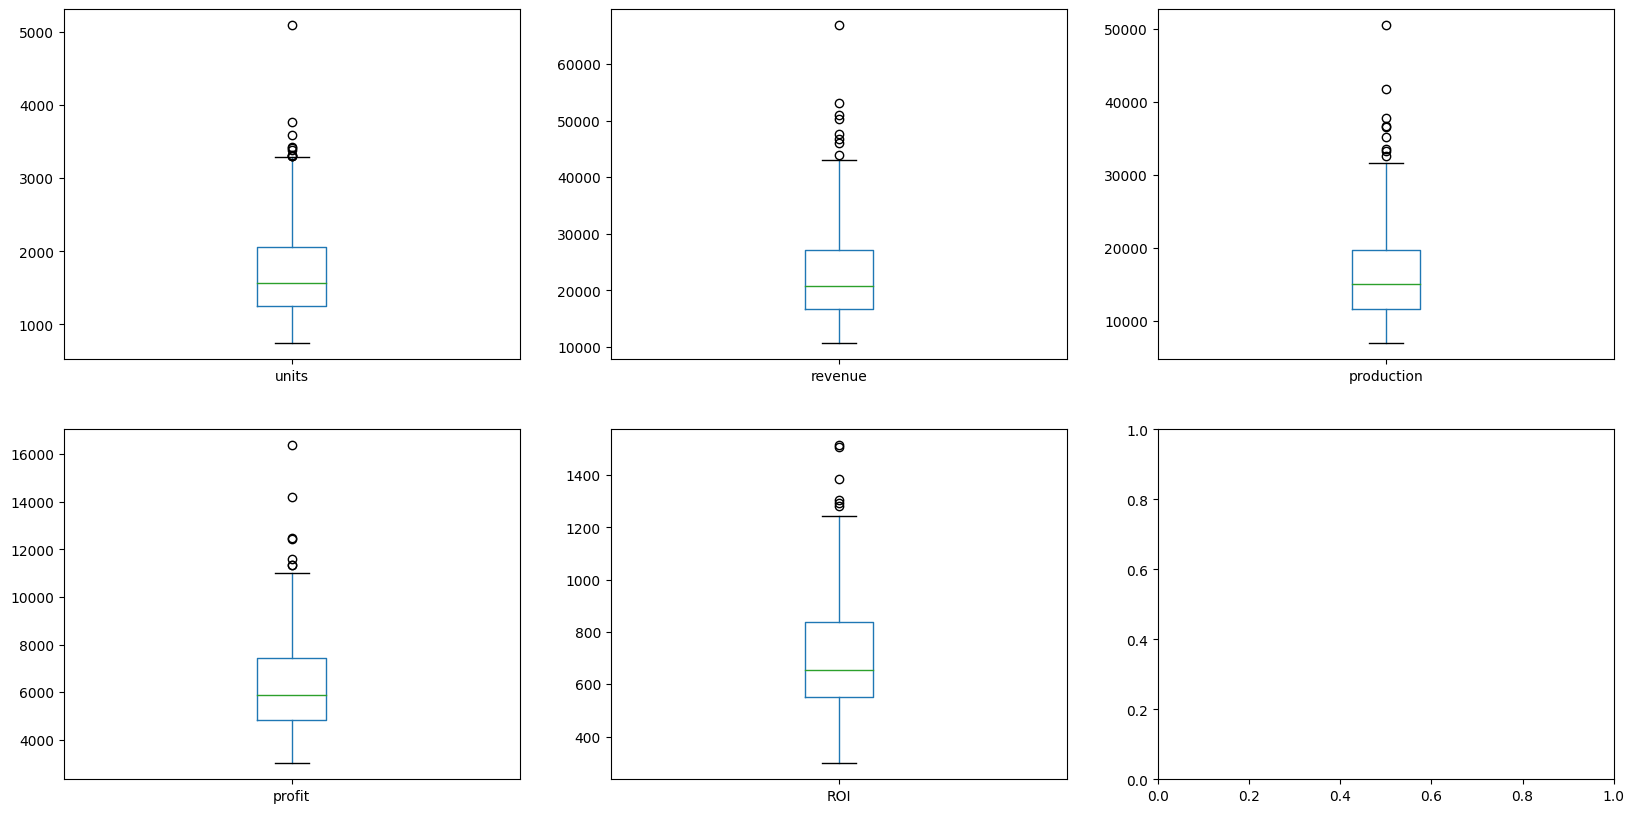

In [ ]:
# filter numeric column
check_outlier = ['units','revenue', 'production', 'profit', 'ROI'] # <------- CHANGE

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(check_outlier):
    a = df_outlier.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

In [ ]:
Q1 = df_outlier.quantile(0.25)
Q3 = df_outlier.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df_outlier < lower_bound) | (df_outlier > upper_bound)).any(axis=1)
print(df_outlier[outliers])

            units   revenue  production   profit       ROI
date                                                      
2017-04-30   3307  47547.93    36525.93  11022.0   936.678
2017-12-24   3586  50900.14    36710.14  14190.0  1514.343
2017-12-25   2869  38525.31    27169.31  11356.0  1279.875
2018-01-06   3388  50269.12    37809.12  12460.0  1383.349
2018-02-03   3305  41929.95    30963.95  10966.0  1166.495
2018-03-10   3302  53025.98    41690.98  11335.0  1073.257
2018-03-18   3434  43993.66    33289.66  10704.0  1096.235
2018-03-30   3774  46040.26    33591.26  12449.0  1244.037
2018-04-08   3283  42948.17    32525.17  10423.0  1184.396
2018-04-29   3408  46766.92    35152.92  11614.0  1294.713
2018-04-30   5095  66843.05    50464.05  16379.0  1507.342
2018-05-20   3312  41633.88    31607.88  10026.0  1057.274
2018-06-17   3288  41285.12    30970.12  10315.0  1303.870


In [ ]:
outlier_percentage = sum(outliers) / len(df_outlier) * 100
print(outlier_percentage)

2.037617554858934


In [ ]:
df_avg = df_avg.groupby(['store_name','city','region','loc'])['units','revenue', 'production','profit','ROI'].mean().reset_index()
df_avg

<ipython-input-11-a5952d3c2e73>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_avg = df_avg.groupby(['store_name','city','region','loc'])['units','revenue', 'production','profit','ROI'].mean().reset_index()


,store_name,city,region,loc,units,revenue,production,profit,ROI
0,Maven Toys Aguascalientes 1,Aguascalientes,West,Downtown,850.714286,11428.445238,8159.778571,3268.666667,0.407810
1,Maven Toys Campeche 1,Campeche,South,Downtown,1169.333333,14846.973333,10644.687619,4202.285714,0.407524
2,Maven Toys Campeche 2,Campeche,South,Commercial,775.095238,9812.153810,7045.915714,2766.238095,0.409095
3,Maven Toys Chetumal 1,Chetumal,South,Downtown,903.095238,12329.492857,9094.254762,3235.238095,0.366476
4,Maven Toys Chihuahua 1,Chihuahua,North,Commercial,860.476190,11809.919048,8495.395238,3314.523810,0.400429
5,Maven Toys Chihuahua 2,Chihuahua,North,Downtown,1063.142857,12795.463810,9116.273333,3679.190476,0.413143
6,Maven Toys Chilpancingo 1,Chilpancingo,West,Downtown,872.714286,11549.510952,8380.082381,3169.428571,0.389429
7,Maven Toys Ciudad Victoria 1,Ciudad Victoria,North,Downtown,976.238095,14038.285238,10081.713810,3956.571429,0.420667
8,Maven Toys Ciudad de Mexico 1,Ciudad de Mexico,Center,Downtown,1594.238095,20645.533810,15345.724286,5299.809524,0.353143
9,Maven Toys Ciudad de Mexico 2,Ciudad de Mexico,Center,Airport,2036.047619,26407.306190,18318.925238,8088.380952,0.452571


In [ ]:
#encoded categorical columns
encoded_df = df_avg.copy()

# Create mappings for categorical columns
city_mapping = {city: idx for idx, city in enumerate(encoded_df['city'].unique())}
region_mapping = {region: idx for idx, region in enumerate(encoded_df['region'].unique())}
loc_mapping = {loc: idx for idx, loc in enumerate(encoded_df['loc'].unique())}

# Apply label encoding
encoded_df['city'] = encoded_df['city'].map(city_mapping)
encoded_df['region'] = encoded_df['region'].map(region_mapping)
encoded_df['loc'] = encoded_df['loc'].map(loc_mapping)

encoded_df.set_index('store_name', inplace=True)
encoded_df.head()

,city,region,loc,units,revenue,production,profit,ROI
store_name,,,,,,,,
Maven Toys Aguascalientes 1,0,0,0,850.714286,11428.445238,8159.778571,3268.666667,0.407810
Maven Toys Campeche 1,1,1,0,1169.333333,14846.973333,10644.687619,4202.285714,0.407524
Maven Toys Campeche 2,1,1,1,775.095238,9812.153810,7045.915714,2766.238095,0.409095
Maven Toys Chetumal 1,2,1,0,903.095238,12329.492857,9094.254762,3235.238095,0.366476
Maven Toys Chihuahua 1,3,2,1,860.476190,11809.919048,8495.395238,3314.523810,0.400429


In [ ]:
encoded_df.describe()

,city,region,loc,units,revenue,production,profit,ROI
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,13.580000,2.120000,0.72000,1038.633333,13756.735571,9933.850810,3822.884762,0.396052
std,7.798718,1.222911,1.03095,236.267194,3180.248248,2287.330151,952.509396,0.038773
min,0.000000,0.000000,0.00000,760.190476,9812.153810,7045.915714,2705.285714,0.327333
25%,7.250000,1.250000,0.00000,900.071429,11614.612976,8515.713929,3219.345238,0.365655
50%,12.500000,2.000000,0.00000,980.928571,12899.161667,9212.465238,3611.761905,0.394619
75%,20.000000,3.000000,1.00000,1101.976190,15288.067381,11031.342024,4216.178571,0.416548
max,28.000000,4.000000,3.00000,2036.047619,26407.306190,18318.925238,8088.380952,0.510857


In [ ]:
# sns.pairplot(encoded_df)

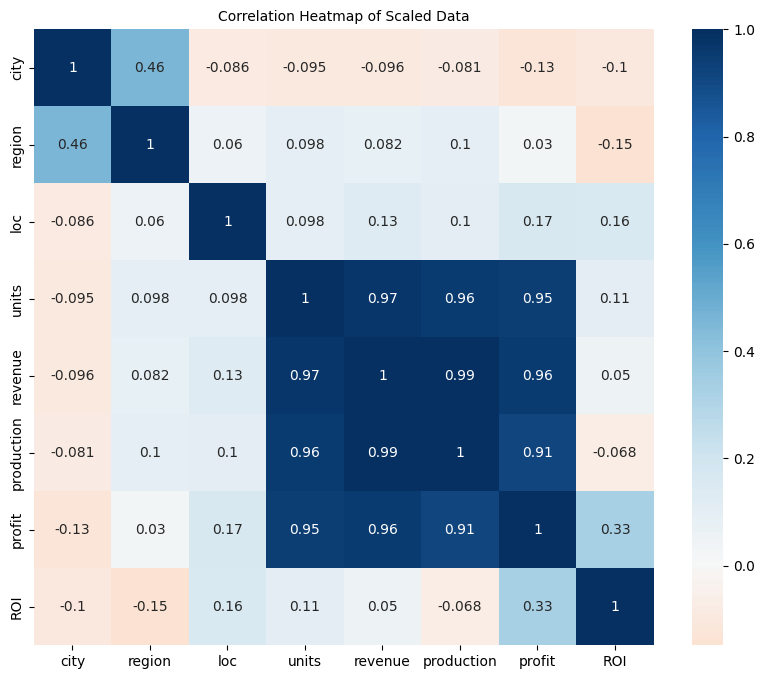

In [ ]:
from sklearn.preprocessing import StandardScaler
# scaler dataframe
# using Standart Scaler
heatmapscaler_df = encoded_df.copy()
columns_to_scale = ['city','region',	'loc',	'units',	'revenue',	'production',	'profit',	'ROI']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
df_scaled = scaler.fit_transform(heatmapscaler_df[columns_to_scale])

# Create a new DataFrame with scaled data
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)

# Calculate the correlation matrix for scaled data
correlation_matrix = df_scaled.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0)
plt.title("Correlation Heatmap of Scaled Data",fontsize=10)
plt.show()

dari data ini 2 yang signifikan korelasi nya rendah yaitu:
* production + ROI -0.068
* production + city -0.081
* location + city -0.086

# Preparing A = 'REVENUE', B = 'PRODUCTION'

Here we want to create our cluster using these feature :
* production
* ROI

In [ ]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering
from yellowbrick.cluster import SilhouetteVisualizer

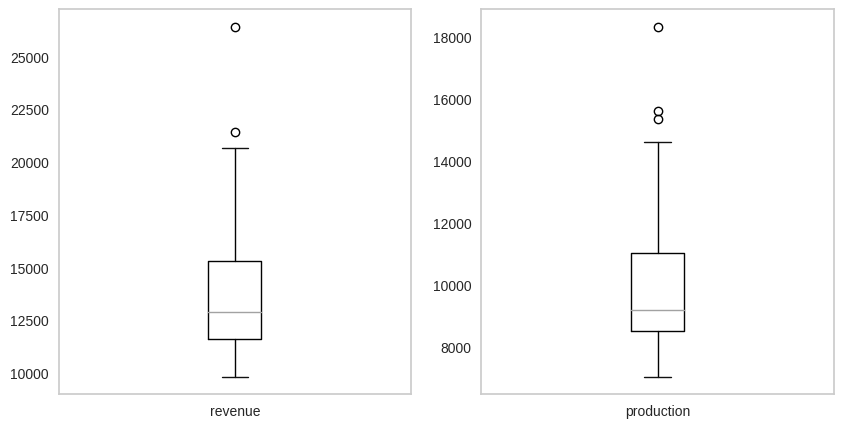

In [ ]:
# filter numeric column
feature = ['revenue','production'] # <------- CHANGE

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = encoded_df.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

In [ ]:
df_segmentation_feature = encoded_df[['revenue','production']].copy() # <------- CHANGE
df_segmentation_feature.rename(columns={'revenue': 'A','production':'B'}, inplace=True) # <------- CHANGE
df_segmentation_feature

,A,B
store_name,,
Maven Toys Aguascalientes 1,11428.445238,8159.778571
Maven Toys Campeche 1,14846.973333,10644.687619
Maven Toys Campeche 2,9812.153810,7045.915714
Maven Toys Chetumal 1,12329.492857,9094.254762
Maven Toys Chihuahua 1,11809.919048,8495.395238
Maven Toys Chihuahua 2,12795.463810,9116.273333
Maven Toys Chilpancingo 1,11549.510952,8380.082381
Maven Toys Ciudad Victoria 1,14038.285238,10081.713810
Maven Toys Ciudad de Mexico 1,20645.533810,15345.724286


In [ ]:
df_segmentation_feature.head()

,A,B
store_name,,
Maven Toys Aguascalientes 1,11428.445238,8159.778571
Maven Toys Campeche 1,14846.973333,10644.687619
Maven Toys Campeche 2,9812.153810,7045.915714
Maven Toys Chetumal 1,12329.492857,9094.254762
Maven Toys Chihuahua 1,11809.919048,8495.395238


In [ ]:
# Define Robust Scale dataset
ss_scale_df = df_segmentation_feature.copy()
rs_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()

# using Standart Scaler
ss_scaler = StandardScaler()
ss_scale_df[['A','B']] = ss_scaler.fit_transform(ss_scale_df[['A','B']])

# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['A','B']] = rs_scaler.fit_transform(rs_scale_df[['A','B']])

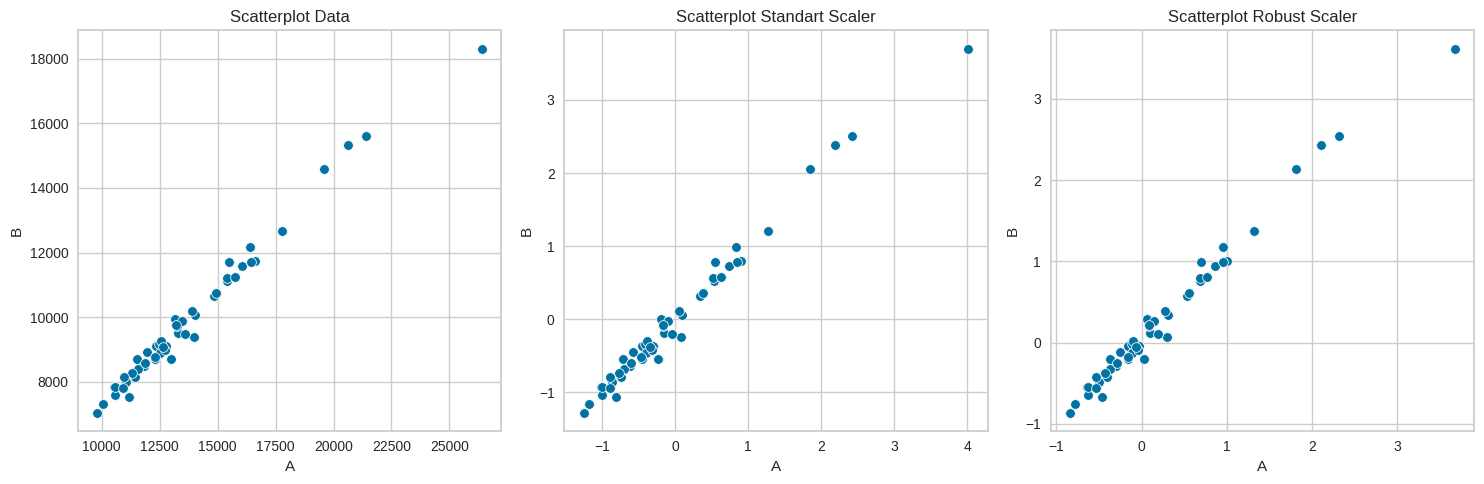

In [ ]:
# Now, create a subplot with 1 rows and 2 columns for scatterplot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first scatterplot for df_segmentation_feature
sns.scatterplot(data = df_segmentation_feature, x='A', y='B', ax=ax[0])
ax[0].set_title('Scatterplot Data')

# Plot the first scatterplot for df_segmentation_feature
sns.scatterplot (data = ss_scale_df, x='A', y='B', ax=ax[1])
ax[1].set_title('Scatterplot Standart Scaler')

# Plot the first scatterplot for rs_scale
sns.scatterplot (data = rs_scale_df, x='A', y='B', ax=ax[2])
ax[2].set_title('Scatterplot Robust Scaler')

# Adjust the layout to prevent overlapping titles and axis labels for scatterplot
plt.tight_layout()

# Show the combined subplot
plt.show()

# Cluster

## Define K-Means Clustering
For k-means clustering, we need to determine n_clusters, number of cluster we want to create.

Let's suppose we want to create 3 cluster of customer. Then n_clusters = 3

In [ ]:
scale_df = ss_scale_df.copy() # <------- CHANGE

In [ ]:
# Initialize KMeans for 3 clusters
cluster_model = KMeans(n_clusters = 3, random_state = 1000, n_init='auto')
cluster_model

KMeans(n_clusters=3, n_init='auto', random_state=1000)

In [ ]:
# Fit the data into model
cluster_model.fit(scale_df)

KMeans(n_clusters=3, n_init='auto', random_state=1000)

In [ ]:
# Check up cluster label created by the KMeans
cluster_model.labels_

array([1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1], dtype=int32)

In [ ]:
# Check up cluster label created by the KMeans
cluster_model.labels_

array([1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1], dtype=int32)

In [ ]:
scale_df = scale_df.copy()
scale_df['cluster'] = cluster_model.labels_
scale_df.head()

,A,B,cluster
store_name,,,
Maven Toys Aguascalientes 1,-0.739542,-0.783483,1
Maven Toys Campeche 1,0.346296,0.313927,0
Maven Toys Campeche 2,-1.252930,-1.275397,1
Maven Toys Chetumal 1,-0.453340,-0.370790,1
Maven Toys Chihuahua 1,-0.618374,-0.635264,1


In [ ]:
scale_df.cluster.value_counts()

1    33
0    13
2     4
Name: cluster, dtype: int64

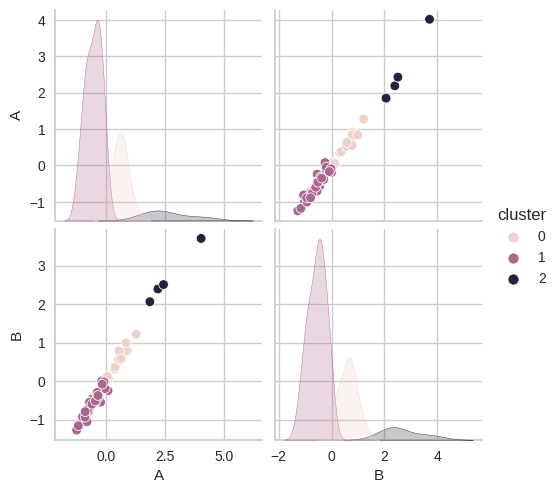

In [ ]:
# Let's re-look into data after clustering
sns.pairplot(scale_df,hue='cluster')

## Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

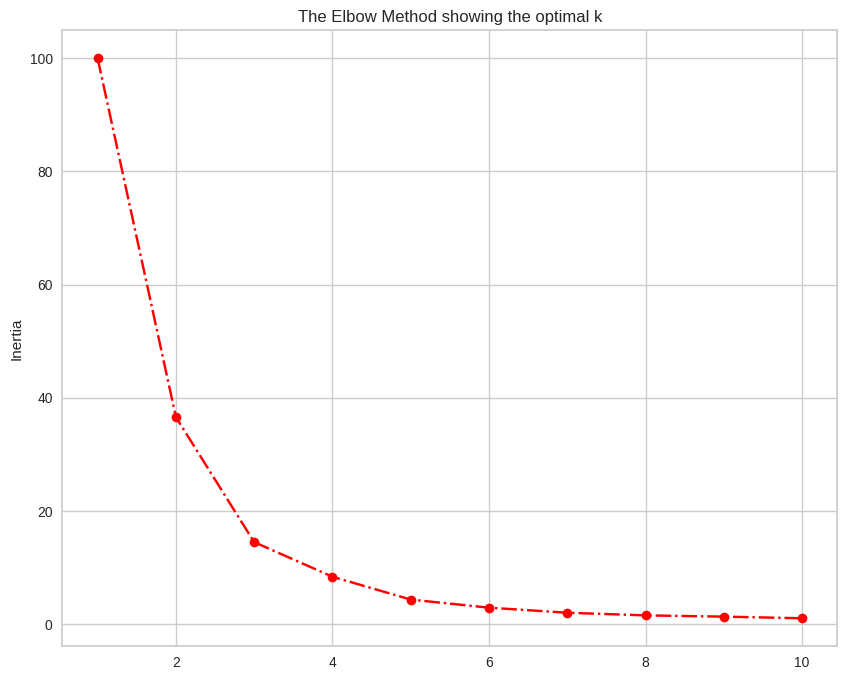

[99.99999999999999, 36.60738329483185, 14.522578785737949, 8.415140047485894, 4.3733084515098675, 2.946123202375846, 2.0542381824683464, 1.5873949778206846, 1.3642311570017034, 1.0739519998082951]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df) # <------- CHANGE
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize = (10,8))
plt.plot(range(1, 11), distortions, marker = 'o', linestyle = '-.',color='red')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

## Silhouette Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For k=2, the average silhouette score is 0.6267413934700715
For k=3, the average silhouette score is 0.6054360655304882
For k=4, the average silhouette score is 0.5697796074258369
For k=5, the average silhouette score is 0.5729226005837509
For k=6, the average silhouette score is 0.5481714844864674
For k=7, the average silhouette score is 0.5247450187459467
For k=8, the average silhouette score is 0.49574112157203054


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=9, the average silhouette score is 0.4861600223177178
For k=10, the average silhouette score is 0.5043451378389673


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


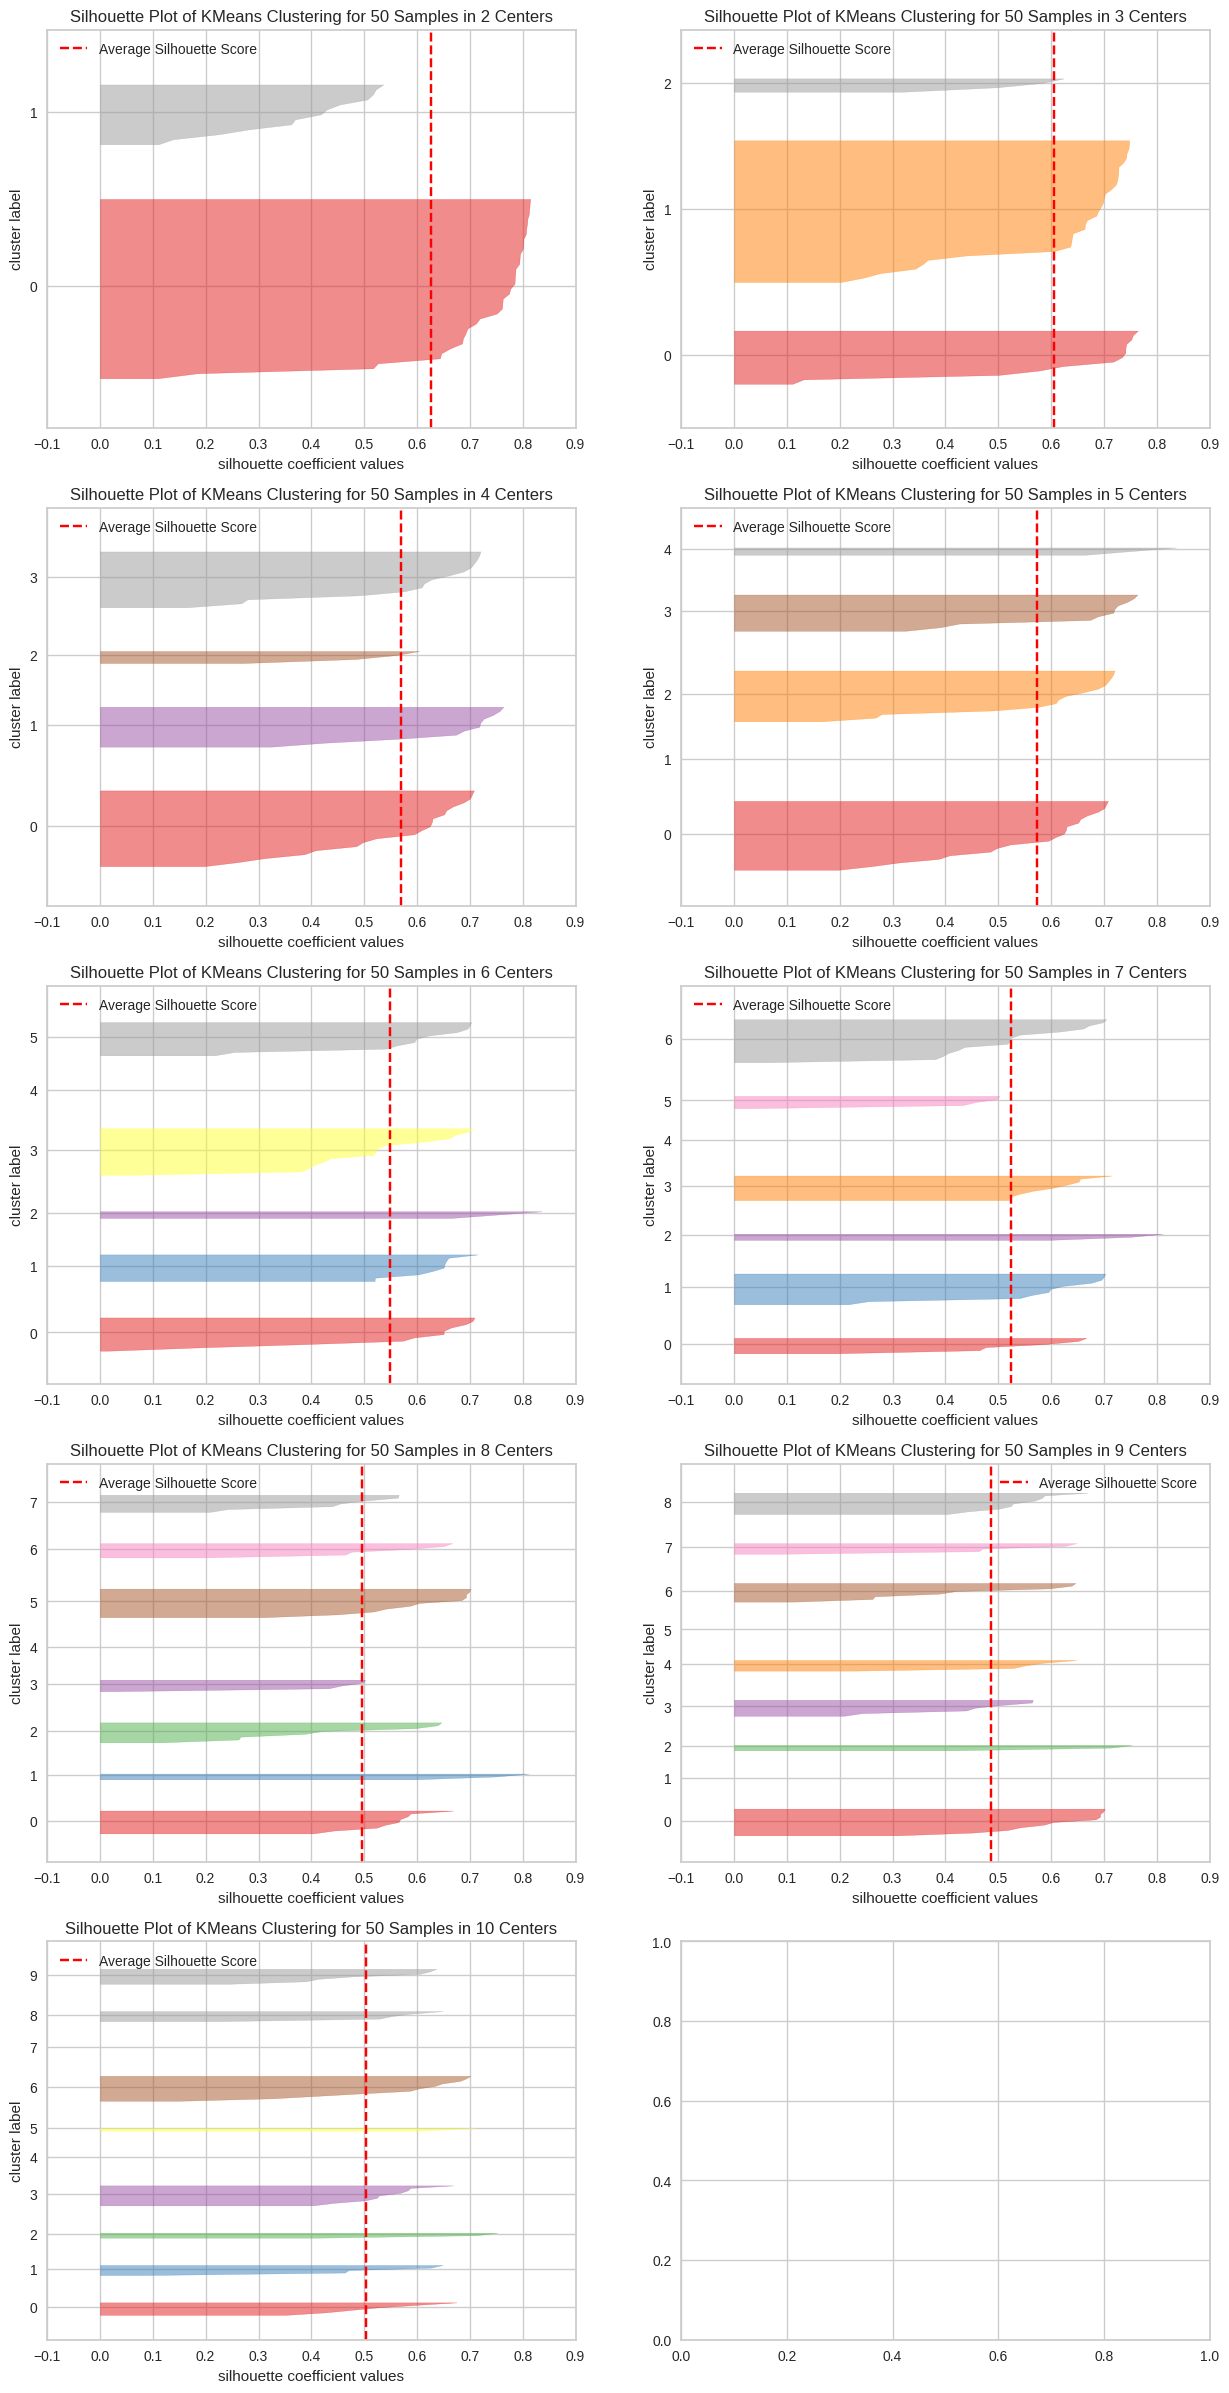

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters, random_state = 42)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(ss_scale_df) # <------- CHANGE
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

# Segmentation
Cluster 5

In [ ]:
# make cluster
Cluster = ss_scale_df.copy() # <------- CHANGE

cluster_model = KMeans(n_clusters=5)
cluster_model.fit_predict(Cluster[['A','B']])
Cluster['cluster'] = cluster_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Boxplot for B = Production (Standart Scaler)')

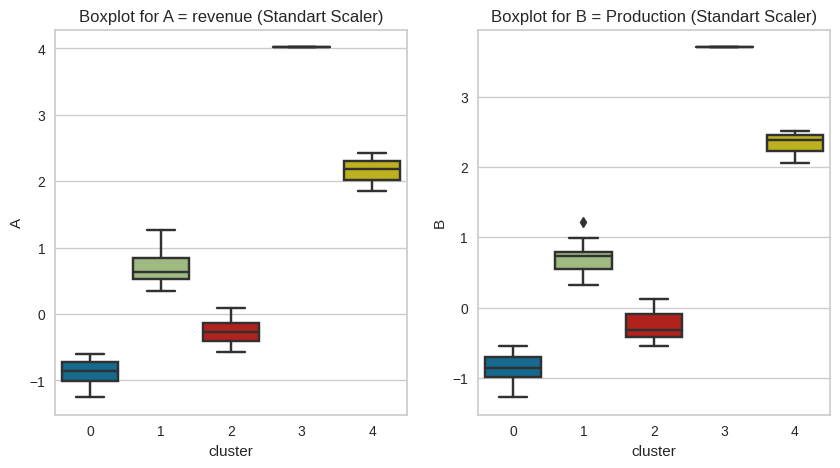

In [ ]:
# Create a subplot with 3 rows and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first boxplot (A) for Cluster_rs
sns.boxplot(data=Cluster, x='cluster', y='A', ax=ax[0])
ax[0].set_title('Boxplot for A = revenue (Standart Scaler)')

# Plot the second boxplot (B) for Cluster_rs
sns.boxplot(data=Cluster, x='cluster', y='B', ax=ax[1])
ax[1].set_title('Boxplot for B = Production (Standart Scaler)')


# Merge Hasil cluster dengan dataset

In [ ]:
Cluster.head()

,A,B,cluster
store_name,,,
Maven Toys Aguascalientes 1,-0.739542,-0.783483,0
Maven Toys Campeche 1,0.346296,0.313927,1
Maven Toys Campeche 2,-1.252930,-1.275397,0
Maven Toys Chetumal 1,-0.453340,-0.370790,2
Maven Toys Chihuahua 1,-0.618374,-0.635264,0


In [ ]:
df_avg = df_avg.reset_index()
Cluster = Cluster.reset_index()
df_segmented = Cluster.merge(df_avg, how= 'inner',right_on='store_name',left_on='store_name')
df_segmented

,store_name,A,B,cluster,index,city,region,loc,units,revenue,production,profit,ROI
0,Maven Toys Aguascalientes 1,-0.739542,-0.783483,0,0,Aguascalientes,West,Downtown,850.714286,11428.445238,8159.778571,3268.666667,0.407810
1,Maven Toys Campeche 1,0.346296,0.313927,1,1,Campeche,South,Downtown,1169.333333,14846.973333,10644.687619,4202.285714,0.407524
2,Maven Toys Campeche 2,-1.252930,-1.275397,0,2,Campeche,South,Commercial,775.095238,9812.153810,7045.915714,2766.238095,0.409095
3,Maven Toys Chetumal 1,-0.453340,-0.370790,2,3,Chetumal,South,Downtown,903.095238,12329.492857,9094.254762,3235.238095,0.366476
4,Maven Toys Chihuahua 1,-0.618374,-0.635264,0,4,Chihuahua,North,Commercial,860.476190,11809.919048,8495.395238,3314.523810,0.400429
5,Maven Toys Chihuahua 2,-0.305332,-0.361066,2,5,Chihuahua,North,Downtown,1063.142857,12795.463810,9116.273333,3679.190476,0.413143
6,Maven Toys Chilpancingo 1,-0.701088,-0.686190,0,6,Chilpancingo,West,Downtown,872.714286,11549.510952,8380.082381,3169.428571,0.389429
7,Maven Toys Ciudad Victoria 1,0.089430,0.065301,2,7,Ciudad Victoria,North,Downtown,976.238095,14038.285238,10081.713810,3956.571429,0.420667
8,Maven Toys Ciudad de Mexico 1,2.188111,2.390043,4,8,Ciudad de Mexico,Center,Downtown,1594.238095,20645.533810,15345.724286,5299.809524,0.353143
9,Maven Toys Ciudad de Mexico 2,4.018242,3.703096,3,9,Ciudad de Mexico,Center,Airport,2036.047619,26407.306190,18318.925238,8088.380952,0.452571


# Visualize Cluster
For no we call our clusters as is, then we will create an interesting name for naming the cluster

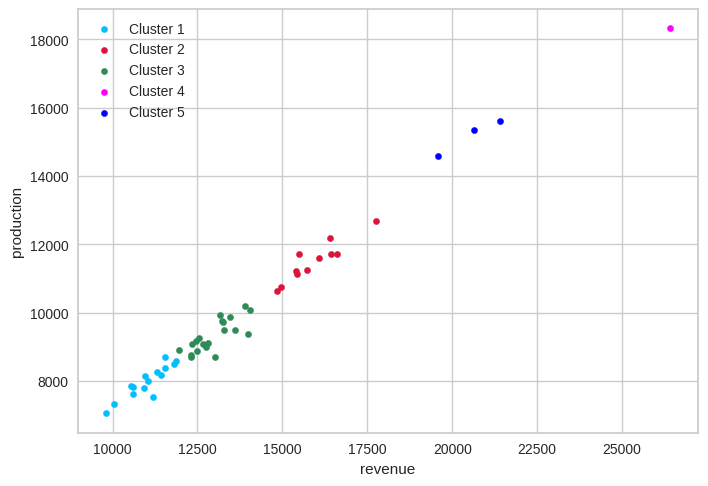

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='revenue', y='production', c='deepskyblue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='revenue', y='production', c='crimson', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='revenue', y='production', c='seagreen', label='Cluster 3', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 3].plot.scatter(x='revenue', y='production', c='magenta', label='Cluster 4', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 4].plot.scatter(x='revenue', y='production', c='blue', label='Cluster 5', ax = cluster_scatter)

## Descriptive Statistic

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['revenue','production']].agg(['count','mean','min','max','median','std']).T

cluster                       0             1             2             3  \
revenue    count      15.000000     11.000000     20.000000      1.000000   
           mean    11014.602000  15916.077792  12975.564000  26407.306190   
           min      9812.153810  14846.973333  11960.043333  26407.306190   
           max     11862.193810  17761.848571  14038.285238  26407.306190   
           median  11052.272381  15733.757143  12899.161667  26407.306190   
           std       608.299516    847.456182    613.934355           NaN   
production count      15.000000     11.000000     20.000000      1.000000   
           mean     7977.732159  11506.272597   9329.337810  18318.925238   
           min      7045.915714  10644.687619   8694.097619  18318.925238   
           max      8692.207619  12676.943810  10205.449048  18318.925238   
           median   7985.653333  11590.650476   9212.465238  18318.925238   
           std       475.266730    596.690703    469.376956           NaN   

cluster                       4  
revenue    count       3.000000  
           mean    20540.768889  
           min     19578.920000  
           max     21397.852857  
           median  20645.533810  
           std       913.980826  
production count       3.000000  
           mean    15183.959365  
           min     14597.396190  
           max     15608.757619  
           median  15345.724286  
           std       524.727455

## Cluster Interpretation
1.   units
2.   cost
3.   price
4.   revenue
5.   production



In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['units','profit','ROI','revenue','production'].mean().round(2)

<ipython-input-40-2731aee639db>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_segmented.groupby(['cluster'], as_index = False)['units','profit','ROI','revenue','production'].mean().round(2)


,cluster,units,profit,ROI,revenue,production
0,0,854.72,3036.87,0.39,11014.60,7977.73
1,1,1167.11,4409.81,0.39,15916.08,11506.27
2,2,979.08,3646.23,0.40,12975.56,9329.34
3,3,2036.05,8088.38,0.45,26407.31,18318.93
4,4,1551.68,5356.81,0.36,20540.77,15183.96


In [ ]:
df_std_segmented = df_segmented.groupby('cluster').agg({
    'units': ['mean'],
    'revenue': [('mean'), ('up',lambda x: x.mean() + x.std()), ('down',lambda x: x.mean() - x.std())],
    'profit': [('mean'), ('up',lambda x: x.mean() + x.std()), ('down',lambda x: x.mean() - x.std())],
    'production': [('mean'), ('up',lambda x: x.mean() + x.std()), ('down',lambda x: x.mean() - x.std())],
    'ROI': [('mean'), ('up',lambda x: x.mean() + x.std()), ('down',lambda x: x.mean() - x.std())]
})
df_std_segmented.round(2)

units   revenue                       profit                    \
            mean      mean        up      down     mean       up     down   
cluster                                                                     
0         854.72  11014.60  11622.90  10406.30  3036.87  3309.82  2763.92   
1        1167.11  15916.08  16763.53  15068.62  4409.81  4776.86  4042.75   
2         979.08  12975.56  13589.50  12361.63  3646.23  4030.20  3262.25   
3        2036.05  26407.31       NaN       NaN  8088.38      NaN      NaN   
4        1551.68  20540.77  21454.75  19626.79  5356.81  5763.60  4950.02   

        production                       ROI              
              mean        up      down  mean    up  down  
cluster                                                   
0          7977.73   8453.00   7502.47  0.39  0.43  0.36  
1         11506.27  12102.96  10909.58  0.39  0.42  0.37  
2          9329.34   9798.71   8859.96  0.40  0.45  0.36  
3         18318.93       NaN       NaN  0.45   NaN   NaN  
4         15183.96  15708.69  14659.23  0.36  0.38  0.34

0 = low
2 = middle low
1 = middle
4 = middle high
3 = high

### Insight

✅ unit, revenue, profit, production
  * `0 and 2` indicated as low performance base on unit, revenue, profit, production, high performance in cluster `3`

✅ ROI
  * `1 and 4` indicated as low performance base on ROI, best ROI in cluster `3`

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['store_name'].count()

,cluster,store_name
0,0,15
1,1,11
2,2,20
3,3,1
4,4,3


✅ Kebanyakan dari toko yang ada merupakan clustering dengan pendapatan mid. lower to lower sebanyak 35/50

In [ ]:
df_segmented.groupby(['loc','cluster'], as_index = False)['store_name'].count()

,loc,cluster,store_name
0,Airport,2,1
1,Airport,3,1
2,Airport,4,1
3,Commercial,0,4
4,Commercial,1,3
5,Commercial,2,5
6,Downtown,0,10
7,Downtown,1,7
8,Downtown,2,10
9,Downtown,4,2


### Insight
✅ Kebanyakan dari toko dengan pendapatan mid. lower to lower berada di Downtown 20/35, disusul oleh komersial 9/35

✅  penyumbang revenue terbesar adalah `airport` dengan cluster 4

In [ ]:
df_segmented.groupby(['region','cluster'], as_index = False)['store_name'].count()

,region,cluster,store_name
0,Center,0,3
1,Center,1,3
2,Center,2,3
3,Center,3,1
4,Center,4,2
5,East,0,1
6,East,1,1
7,East,2,5
8,North,0,5
9,North,1,5


## Change cluster 0 = low, 2 = mid.low

### Insight
✅ Kebanyakan dari toko dengan pendapatan mid. lower to lower berada di North 13/35, di lain kota menyumbang 5/6 toko dari 35 toko dengan low performance

In [ ]:
low = {0,2} # <---- change base on cluster {low , mid.low}
city_cluster = df_segmented[df_segmented['cluster'].isin(low)].groupby(['city', 'cluster'], as_index=False)['store_name'].count().copy()
city_cluster.rename(columns={'store_name':'stores_in_cluster'}, inplace=True)
city_cluster

,city,cluster,stores_in_cluster
0,Aguascalientes,0,1
1,Campeche,0,1
2,Chetumal,2,1
3,Chihuahua,0,1
4,Chihuahua,2,1
5,Chilpancingo,0,1
6,Ciudad Victoria,2,1
7,Cuernavaca,0,1
8,Culiacan,2,1
9,Durango,0,1


In [ ]:
city_low = city_cluster['city'].to_list()
city_low

['Aguascalientes',
 'Campeche',
 'Chetumal',
 'Chihuahua',
 'Chihuahua',
 'Chilpancingo',
 'Ciudad Victoria',
 'Cuernavaca',
 'Culiacan',
 'Durango',
 'Guadalajara',
 'Guanajuato',
 'Hermosillo',
 'La Paz',
 'Merida',
 'Mexicali',
 'Monterrey',
 'Morelia',
 'Oaxaca',
 'Pachuca',
 'Puebla',
 'Saltillo',
 'San Luis Potosi',
 'Santiago',
 'Toluca',
 'Tuxtla Gutierrez',
 'Villahermosa',
 'Xalapa',
 'Zacatecas']

In [ ]:
city_low = city_cluster['city'].to_list()

city_store = df_segmented[df_segmented['city'].isin(city_low)].groupby(['city'], as_index=False)['store_name'].count().copy()
city_store.rename(columns={'store_name':'stores_in_city'}, inplace=True)
city_store

,city,stores_in_city
0,Aguascalientes,1
1,Campeche,2
2,Chetumal,1
3,Chihuahua,2
4,Chilpancingo,1
5,Ciudad Victoria,1
6,Cuernavaca,1
7,Culiacan,1
8,Durango,1
9,Guadalajara,4


In [ ]:
city_cluster = city_cluster.merge(city_store, 'inner', left_on='city', right_on='city')

total_low_mid_low = city_cluster['stores_in_cluster'].sum()

city_cluster = city_cluster.sort_values(by='stores_in_city', ascending=False)

In [ ]:
print(f'Total stores in low and mid low = ({total_low_mid_low} from 50 stores)')
city_cluster

Total stores in low and mid low = (35 from 50 stores)


,city,cluster,stores_in_cluster,stores_in_city
16,Monterrey,2,2,4
10,Guadalajara,2,2,4
20,Puebla,2,3,3
12,Hermosillo,0,1,3
11,Guanajuato,2,2,3
27,Xalapa,2,1,2
3,Chihuahua,0,1,2
4,Chihuahua,2,1,2
15,Mexicali,2,2,2
24,Toluca,0,1,2


### Insight
✅ Seluruh kota ini yang patut diguard untuk  peningkatan pertumbuhan pendapatan sebesar 20%  tahunan. kota-kota seperti : Guadalajara `2/4`, Guanajuato `2/3`,	Puebla `3/3` Chihuahua `2/2`. sangat perlu di jaga kerena >50% merupakan toko dengan `cluster low dan mid.low`

Tableau format

0 = low
2 = middle low
1 = middle
4 = middle high
3 = high

In [ ]:
Tableau = df_segmented[['store_name','cluster']]
Tableau['cluster'] = Tableau['cluster'].replace({0: 'low', 2: 'middle low',1: 'middle',4: 'middle high',3: 'high'})
Tableau

<ipython-input-60-2aa989f46c02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tableau['cluster'] = Tableau['cluster'].replace({0: 'low', 2: 'middle low',1: 'middle',4: 'middle high',3: 'high'})


,store_name,cluster
0,Maven Toys Aguascalientes 1,low
1,Maven Toys Campeche 1,middle
2,Maven Toys Campeche 2,low
3,Maven Toys Chetumal 1,middle low
4,Maven Toys Chihuahua 1,low
5,Maven Toys Chihuahua 2,middle low
6,Maven Toys Chilpancingo 1,low
7,Maven Toys Ciudad Victoria 1,middle low
8,Maven Toys Ciudad de Mexico 1,middle high
9,Maven Toys Ciudad de Mexico 2,high


In [ ]:
Tableau[['cluster']].value_counts()

cluster    
middle low     20
low            15
middle         11
middle high     3
high            1
dtype: int64

In [ ]:
Tableau.to_excel('clustering.xlsx', index=False)